Basis Pursuit DeNoising (Accelerated PGM)
=========================================

This example demonstrates the use of class
[pgm.AcceleratedPGM](../_autosummary/scico.pgm.rst#scico.pgm.AcceleratedPGM)
to solve the sparse coding problem problem

  $$\mathrm{argmin}_{\mathbf{x}} \; \| \mathbf{y} - D \mathbf{x} \|_2^2
  + \lambda \| \mathbf{x} \|_1\;,$$

where $D$ the dictionary, $\mathbf{y}$ the signal to be represented,
and $\mathbf{x}$ is the sparse representation.

In [1]:
import numpy as np

import jax

from scico import functional, linop, loss, plot
from scico.pgm import AcceleratedPGM
from scico.util import device_info
plot.config_notebook_plotting()

Construct a random dictionary, a reference random sparse
representation, and a test signal consisting of the synthesis of the
reference sparse representation.

In [2]:
m = 512  # Signal size
n = 4 * m  # Dictionary size
s = 32  # Sparsity level (number of non-zeros)
σ = 0.5  # Noise level

np.random.seed(12345)
D = np.random.randn(m, n)
L0 = np.linalg.norm(D, 2) ** 2

x_gt = np.zeros(n)  # true signal
idx = np.random.permutation(list(range(0, n - 1)))
x_gt[idx[0:s]] = np.random.randn(s)
y = D @ x_gt + σ * np.random.randn(m)  # synthetic signal

x_gt = jax.device_put(x_gt)  # convert to jax array, push to GPU
y = jax.device_put(y)  # convert to jax array, push to GPU

Set up the forward operator and AcceleratedPGM solver object.

In [3]:
maxiter = 100
λ = 2.98e1
A = linop.MatrixOperator(D)
f = loss.SquaredL2Loss(y=y, A=A)
g = λ * functional.L1Norm()
solver = AcceleratedPGM(f=f, g=g, L0=L0, x0=A.adj(y), maxiter=maxiter, verbose=True)

Run the solver.

In [4]:
print(f"Solving on {device_info()}\n")
x = solver.solve()
hist = solver.itstat_object.history(transpose=True)

Solving on GPU (NVIDIA GeForce RTX 2080 Ti)



Iter  Time      Objective  L         Residual
---------------------------------------------
   0  1.32e+00  7.795e+09  4.611e+03  4.126e+03


   1  2.60e+00  2.097e+09  4.611e+03  1.310e+03
   2  2.61e+00  5.399e+08  4.611e+03  4.524e+02
   3  2.61e+00  1.406e+08  4.611e+03  1.845e+02
   4  2.61e+00  4.021e+07  4.611e+03  1.002e+02
   5  2.62e+00  1.382e+07  4.611e+03  6.608e+01
   6  2.62e+00  5.955e+06  4.611e+03  4.542e+01
   7  2.62e+00  3.351e+06  4.611e+03  3.125e+01
   8  2.62e+00  2.373e+06  4.611e+03  2.261e+01
   9  2.63e+00  1.771e+06  4.611e+03  1.751e+01
  10  2.63e+00  1.211e+06  4.611e+03  1.369e+01
  11  2.63e+00  7.238e+05  4.611e+03  1.023e+01
  12  2.63e+00  3.867e+05  4.611e+03  7.277e+00
  13  2.64e+00  2.045e+05  4.611e+03  5.249e+00
  14  2.64e+00  1.251e+05  4.611e+03  4.212e+00
  15  2.64e+00  9.184e+04  4.611e+03  3.683e+00
  16  2.65e+00  7.175e+04  4.611e+03  3.203e+00
  17  2.65e+00  5.452e+04  4.611e+03  2.665e+00
  18  2.66e+00  4.005e+04  4.611e+03  2.153e+00
  19  2.67e+00  2.904e+04  4.611e+03  1.756e+00
  20  2.67e+00  2.102e+04  4.611e+03  1.476e+00
  21  2.67e+00  1.503e+04  4.611e+03  1.

  53  2.80e+00  8.243e+02  4.611e+03  1.639e-02
  54  2.81e+00  8.244e+02  4.611e+03  1.716e-02
  55  2.81e+00  8.246e+02  4.611e+03  1.604e-02
  56  2.81e+00  8.249e+02  4.611e+03  1.536e-02
  57  2.82e+00  8.249e+02  4.611e+03  1.426e-02
  58  2.82e+00  8.247e+02  4.611e+03  1.538e-02
  59  2.82e+00  8.244e+02  4.611e+03  1.265e-02
  60  2.83e+00  8.240e+02  4.611e+03  1.229e-02
  61  2.83e+00  8.234e+02  4.611e+03  1.125e-02
  62  2.84e+00  8.228e+02  4.611e+03  1.075e-02
  63  2.84e+00  8.221e+02  4.611e+03  9.987e-03
  64  2.85e+00  8.215e+02  4.611e+03  9.179e-03
  65  2.85e+00  8.210e+02  4.611e+03  1.101e-02
  66  2.86e+00  8.206e+02  4.611e+03  7.594e-03
  67  2.86e+00  8.203e+02  4.611e+03  8.157e-03
  68  2.87e+00  8.202e+02  4.611e+03  6.300e-03
  69  2.87e+00  8.201e+02  4.611e+03  7.833e-03
  70  2.87e+00  8.201e+02  4.611e+03  6.280e-03
  71  2.87e+00  8.201e+02  4.611e+03  7.017e-03
  72  2.88e+00  8.201e+02  4.611e+03  5.411e-03
  73  2.88e+00  8.201e+02  4.611e+03  4.

Plot the recovered coefficients and convergence statistics.

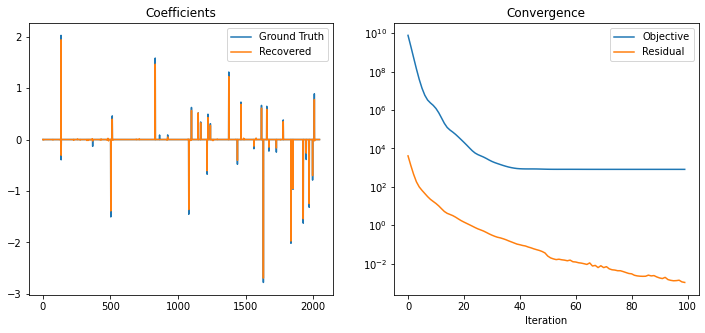

In [5]:
fig, ax = plot.subplots(nrows=1, ncols=2, figsize=(12, 5))
plot.plot(
    np.vstack((x_gt, x)).T,
    title="Coefficients",
    lgnd=("Ground Truth", "Recovered"),
    fig=fig,
    ax=ax[0],
)
plot.plot(
    np.vstack((hist.Objective, hist.Residual)).T,
    ptyp="semilogy",
    title="Convergence",
    xlbl="Iteration",
    lgnd=("Objective", "Residual"),
    fig=fig,
    ax=ax[1],
)
fig.show()